---
# 1) Resumo

Neste notebook foi feito o treinamento do modelo final selecionado (**Random Forest Tree**). 

Os hyperparamentros seleciona foram:
   
* Random Forest Tree
    >* n_estimators    : [400]
    >* max_depth       : [7]    
    >* criterion       : [entropy]
    >* min_samples_leaf: [4]
    >* max_leaf_nodes  : [10]
    
O modelo foi treinado com todos os dados disponiveis (**351**) utilizando as variaveis explicativa obtidas pelo featurewiz ([notebook](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/Selecao_variaveis/selecao_variaveis_featurewiz.ipynb), [lista das variaveis](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Dados/Tratados/dados_featurewiz_colunas.csv)). O modelo foi salvo e carregado usando a biblioteca **joblib**.


---
# 2) Pre-analise

---
## 2.1) Minhas Funções

In [31]:
# Maquina Local 
maquina_local = True

if (maquina_local):
    import sys
    sys.path.insert(1, "../../")

    from src.plota_graficos import plota_curva_roc
    from src.ml import retorna_x_y, intervalo_de_confianca, obtem_nome_modelo 
    from src.info import dimensao_dados
# Collab
#else:
#   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/requirements.txt"
#   !pip3 install -r requirements.txt
#   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/plota_graficos.py"
#   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/ml.py"
#   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/info.py"

#   from plota_graficos import plota_curva_roc
#   from ml import retorna_x_y, intervalo_de_confianca
#   from info import dimensao_dados

---
## 2.2) Importando libs

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
import joblib

## 2.3) Versão dos bibilotecas

In [33]:
import sklearn as sk
import scipy   as sc
import matplotlib as mpl
import numpy as np

print(f'joblib     : {joblib.__version__}')
print(f'sklearn    : {sk.__version__}')
print(f'pandas     : {pd.__version__}')
print(f'numpy      : {np.__version__}')
print(f'matplotlib : {mpl.__version__}')

joblib     : 1.0.1
sklearn    : 0.24.2
pandas     : 1.2.4
numpy      : 1.20.2
matplotlib : 3.3.4


---
# 3) Treinando modelos 

In [34]:
path = 'https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_featurewiz.csv'

dados = pd.read_csv(path)

dimensao_dados(dados)

Numero de linhas : 351 
Numero de colunas: 26 


## 3.1) Treinando o modelo

In [35]:
rng = RandomState(MT19937(SeedSequence(18846)))

x, y = retorna_x_y(dados)

modelo = RandomForestClassifier(random_state = rng,
                                n_estimators=400, 
                                min_samples_leaf=4, 
                                max_leaf_nodes=10,
                                max_depth=7, 
                                criterion='entropy')

modelo.fit(x,y)

RandomForestClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=10,
                       min_samples_leaf=4, n_estimators=400,
                       random_state=RandomState(MT19937) at 0x24406889440)

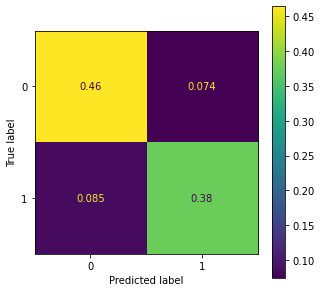

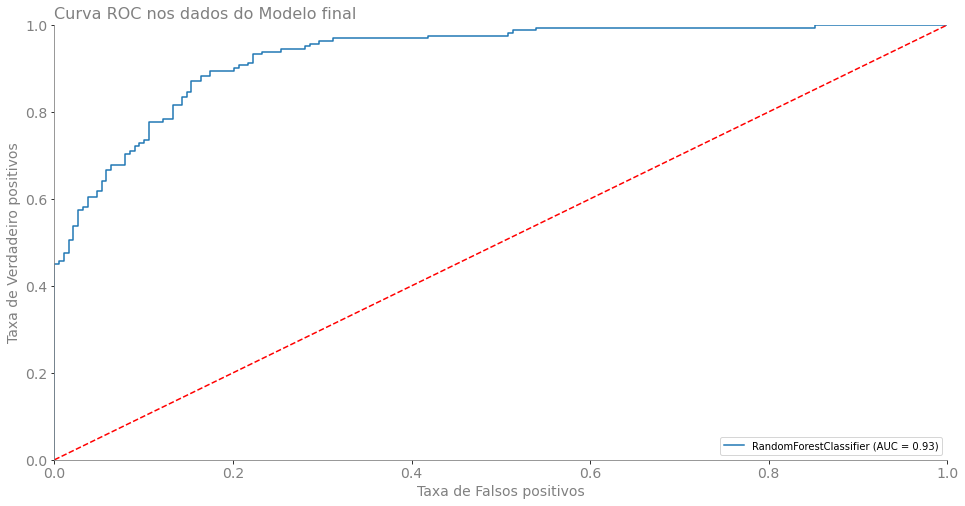

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(modelo, x, y, ax=ax, normalize='all')
plota_curva_roc([modelo], titulo='Curva ROC nos dados do Modelo final', x=x, y=y)

> O modelo treinando com a base toda teve o resltados bem proximos do antreriores, mostrando assim que não houve problema no treinamento.

## 3.2) Salvando o modelo 

In [37]:
caminho_saida = '../../Modelo_ML/'
joblib.dump(modelo, filename=caminho_saida+'modelo_final.sav')

['../../Modelo_ML/modelo_final.sav']

## 3.3) Carregando o modelo de do arquivo

In [38]:
# load the model from disk
carregar_modelo = joblib.load(caminho_saida+'modelo_final.sav')
obtem_nome_modelo(carregar_modelo)

'RandomForestClassifier'

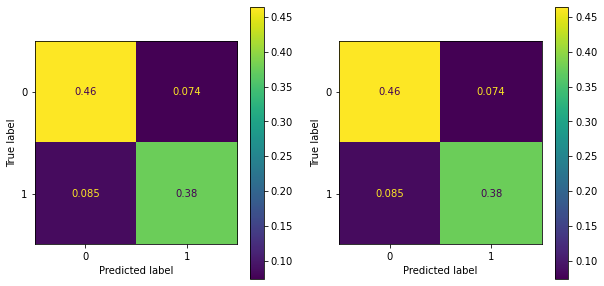

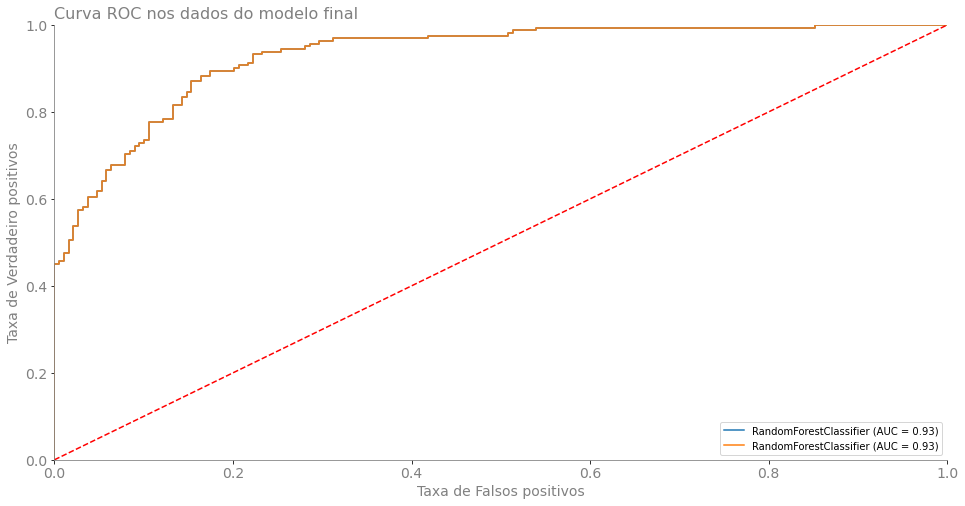

In [39]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
plot_confusion_matrix(carregar_modelo, x, y, ax=ax[0], normalize='all')
plot_confusion_matrix(modelo, x, y, ax=ax[1], normalize='all')

plota_curva_roc([modelo, carregar_modelo], titulo='Curva ROC nos dados do modelo final', x=x, y=y)

> O modelo carregado de exatamente os mesmos resultado no modelo radado. Mostrando que o salvamento e carregamento funcionou.

---
# 4) Conclusão

Finalmente agora temos um modelo de ML capaz de predizer com um certo grau de acuracia se o paciente irá precisar ao não de UTI apenas com os dados clinicos de horas antes. 

---
Navegação:

---

[Voltar para o Notebook anterior (Treinamentos com varias escolhas de variaveis explicativas)](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/ML/treina_diferentes_var_explicativas.ipynb)

---

[Retornar para README principal](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final)

---